### Problem Statement: To predict the sales of a product based on the modes of advertising (TV, Radio, Newspaper).

In [25]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [26]:
#Read input data
df = pd.read_csv('advertising.csv')

In [27]:
#Display first 10 rows
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [28]:
#Find empty values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [29]:
#Find the datatypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [30]:
#Obtain the rows and columns
df.shape

(200, 4)

In [31]:
#Obtain further information about data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


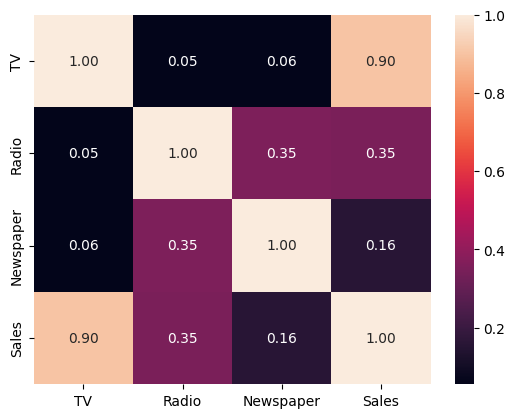

In [32]:
#plot the correlation
sb.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

### Since the correlation between TV and Sales is the highest, only TV has been considered as the most important feature variable.

In [33]:
X = df[['TV']]
Y = df['Sales']

In [34]:
X.shape

(200, 1)

In [35]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
#Find the best fit line in Simple linear regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [37]:
#Predict data
Y_pred = lr.predict(X_test)
Y_pred

array([16.06747317, 17.84847567, 23.25806271,  7.65625887, 19.23000098,
       11.17387752, 19.03581067,  9.78125562, 19.34651516, 16.72217191,
        8.75482116, 10.12524988, 20.01785878,  7.30671633, 14.74697911,
       16.45030549,  7.41213392, 17.97053815, 11.18497411, 20.17875932,
       19.74044406, 10.76885203,  9.1154603 , 20.92777906, 10.83543156,
        9.97544593, 18.85271696, 14.73588252, 11.84522114,  7.47316516,
       18.09260063, 10.84652815, 18.04266598,  7.94477018, 22.58117079,
       20.22314567,  9.68693462, 22.19279018, 13.50970946,  8.53288939])

In [38]:
#Find the line slope
print(lr.coef_)

[0.05548294]


In [39]:
#FInd the line intercept
print(lr.intercept_)

7.00710842824185


In [40]:
### Best fit line: Y(Sales) = 0.055*X(TV) + 7.007

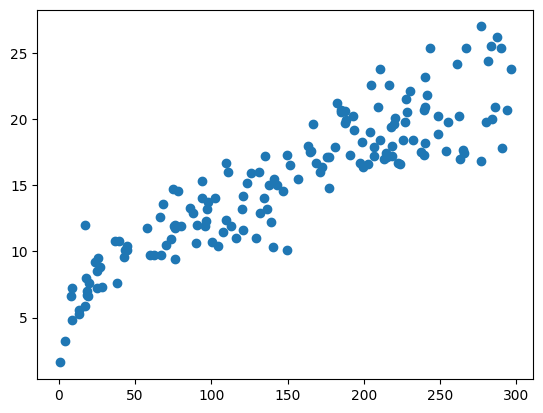

In [41]:
plt.scatter(X_train, Y_train)
plt.show()

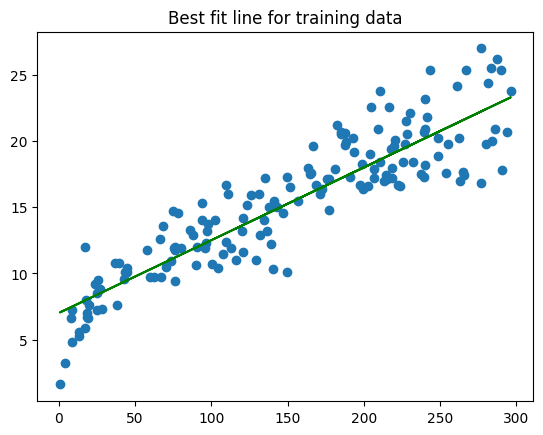

In [42]:
#Plot the best fit line for training data
plt.scatter(X_train, Y_train)
plt.plot(X_train, 0.055*X_train + 7.007, 'g')
plt.title('Best fit line for training data')
plt.show()

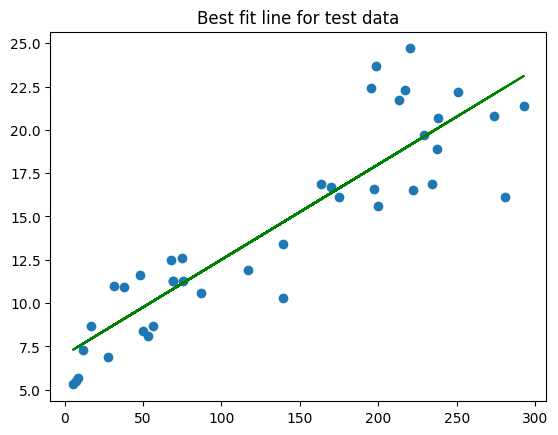

In [43]:
#Plot the best fit line for test data
plt.scatter(X_test, Y_test)
plt.plot(X_test, 0.055*X_test + 7.007, 'g')
plt.title('Best fit line for test data')
plt.show()

In [44]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_pred, 'Actual Value': Y_test})
results_diff

,Predicted Value,Actual Value
95,16.067473,16.9
15,17.848476,22.4
30,23.258063,21.4
158,7.656259,7.3
128,19.230001,24.7
115,11.173878,12.6
69,19.035811,22.3
170,9.781256,8.4
174,19.346515,16.5
45,16.722172,16.1


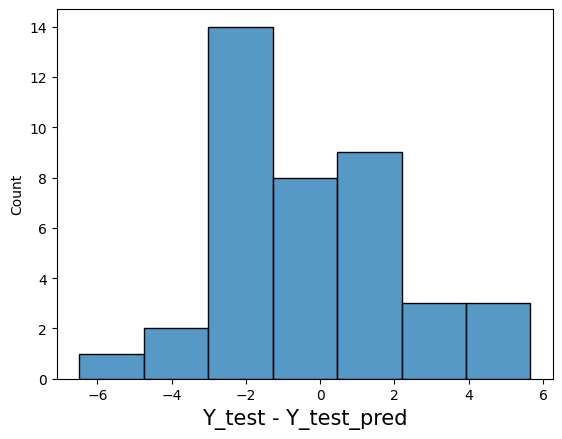

In [45]:
#Plot the histogram for the error/cost function
fig = plt.figure()
sb.histplot(Y_test - Y_pred)
plt.xlabel('Y_test - Y_test_pred', fontsize = 15)
plt.show()

In [46]:
#Compute the metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  1.9502948931650088
Mean Squared Error:  6.101072906773963
R2 coefficient:  0.802561303423698
